# Criação dos Sinais Analisados

In [1]:
import sys
sys.path.append('../')
from pacote import pantompkins
from pacote import batimentos
from pacote import filtro
import pandas as pd
import matplotlib.pyplot as plt

## Leitura de Arquivos

In [2]:
codigo = [111975006] # codigo da arritmia
leads = [0] # as derivacoes do sinal
diretorio = '../data/' # onde esta localizado as bases com arquivos dos sinais
n_Files = 100

In [3]:
ecg_sig = batimentos.records(diretorio, codigo, leads, n_Files)

In [4]:
ecg_sig = ecg_sig.reset_index()
ecg_sig = ecg_sig.drop(['index'], axis=1)
print(f'Shape: {ecg_sig.shape}')
ecg_sig.head()

Shape: (100, 5004)


,0,1,2,3,4,5,6,7,8,9,...,4994,4995,4996,4997,4998,4999,arritmia,leads,fs,arquivo
0,-0.098,-0.088,-0.102,-0.088,-0.093,-0.078,-0.068,-0.083,-0.073,-0.073,...,0.088,0.068,0.044,0.054,0.063,0.088,111975006,0,500,JS18585
1,-0.065,-0.065,-0.065,-0.065,-0.065,-0.065,-0.061,-0.060,-0.060,-0.060,...,0.035,0.035,0.035,0.035,0.035,0.035,111975006,0,500,HR10109
2,0.010,0.020,0.024,0.020,-0.005,-0.024,-0.005,0.010,-0.005,-0.015,...,-0.200,-0.166,-0.156,-0.166,-0.176,-0.200,111975006,0,500,JS12913
3,0.045,0.045,0.045,0.045,0.045,0.045,0.046,0.077,0.136,0.164,...,-0.055,-0.055,-0.055,-0.055,-0.055,-0.055,111975006,0,500,HR07333
4,-0.620,-0.595,-0.576,-0.590,-0.600,-0.512,-0.522,-0.561,-0.537,-0.576,...,0.049,-0.020,-0.054,-0.063,-0.073,-0.039,111975006,0,500,JS18928


## Separar beats

Dividir os batimentos em treinamento, validação; teste

90% --- 10%

In [5]:
# vetor de arquivos unicos com tamanho de 10% do total
arq_teste = [ecg_sig['arquivo'].unique()[x] for x in range(int(len(ecg_sig['arquivo'].unique())*0.1))]

In [6]:
# Criar data Frame de Teste
test_df = pd.DataFrame()
for x in range(len(arq_teste)):
    test_df = test_df.append(ecg_sig.loc[lambda ecg_sig: ecg_sig['arquivo'] == arq_teste[x]])

print(f'Shape: {test_df.shape}')
test_df.head()


Shape: (10, 5004)


,0,1,2,3,4,5,6,7,8,9,...,4994,4995,4996,4997,4998,4999,arritmia,leads,fs,arquivo
0,-0.098,-0.088,-0.102,-0.088,-0.093,-0.078,-0.068,-0.083,-0.073,-0.073,...,0.088,0.068,0.044,0.054,0.063,0.088,111975006,0,500,JS18585
1,-0.065,-0.065,-0.065,-0.065,-0.065,-0.065,-0.061,-0.060,-0.060,-0.060,...,0.035,0.035,0.035,0.035,0.035,0.035,111975006,0,500,HR10109
2,0.010,0.020,0.024,0.020,-0.005,-0.024,-0.005,0.010,-0.005,-0.015,...,-0.200,-0.166,-0.156,-0.166,-0.176,-0.200,111975006,0,500,JS12913
3,0.045,0.045,0.045,0.045,0.045,0.045,0.046,0.077,0.136,0.164,...,-0.055,-0.055,-0.055,-0.055,-0.055,-0.055,111975006,0,500,HR07333
4,-0.620,-0.595,-0.576,-0.590,-0.600,-0.512,-0.522,-0.561,-0.537,-0.576,...,0.049,-0.020,-0.054,-0.063,-0.073,-0.039,111975006,0,500,JS18928


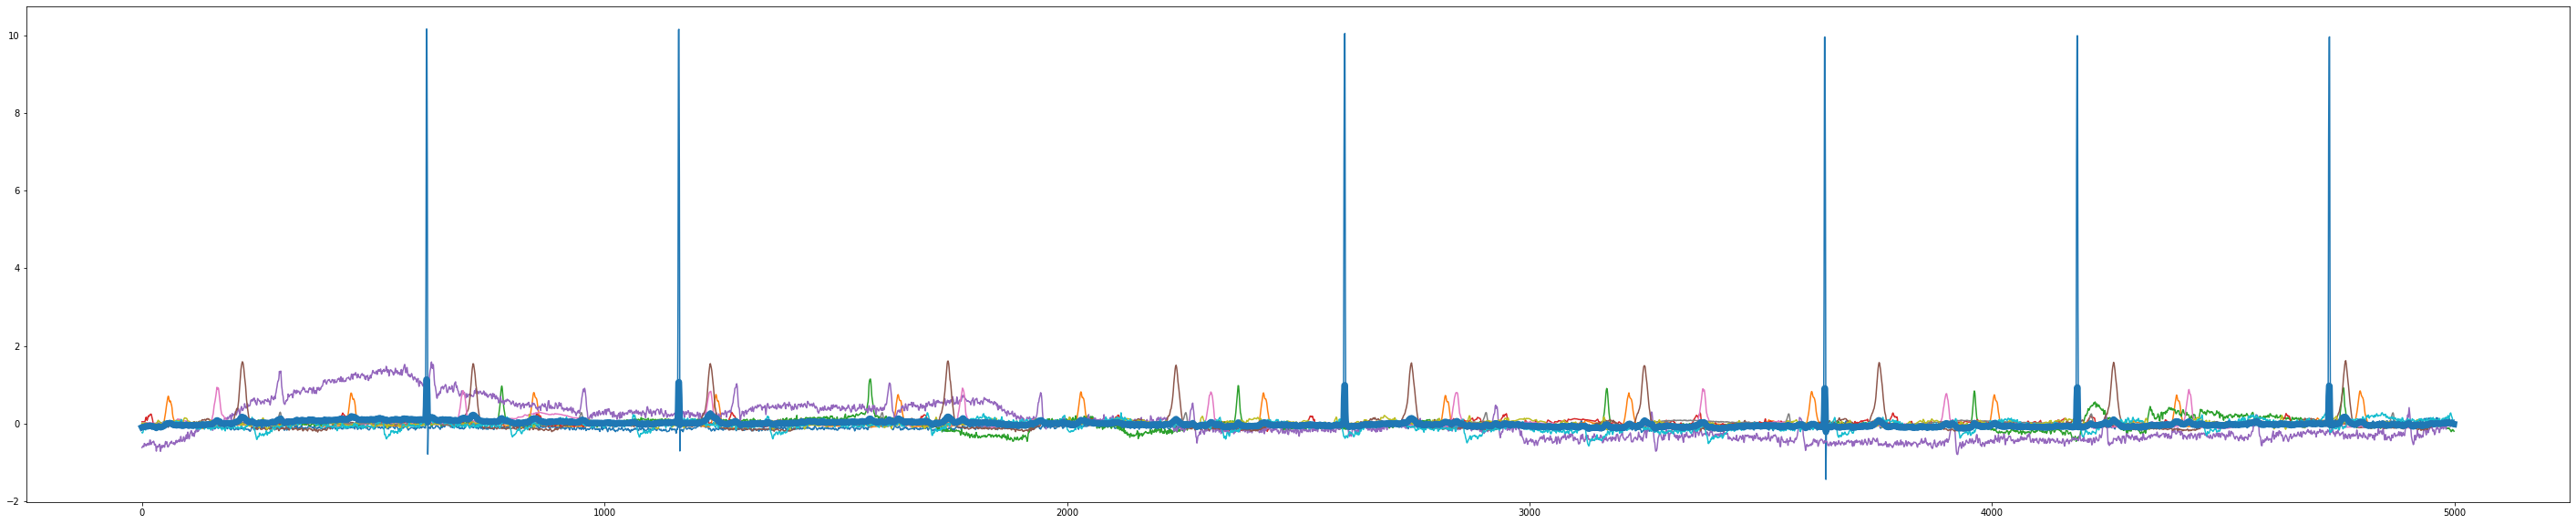

In [7]:
plt.figure(figsize=(50,10))
plt.plot(test_df.iloc[:,:-4].T);
plt.plot(test_df.iloc[:,:-4].T.mean(axis=1),linewidth=7);

In [8]:
# Criar Data Frame de Treino / Validacao
index_ecg = set(ecg_sig.index)
index_test = set(test_df.index)

train_val_df = pd.DataFrame(ecg_sig.iloc[list(index_ecg-index_test)])


print(f'Shape: {train_val_df.shape}')
train_val_df.head()

Shape: (90, 5004)


,0,1,2,3,4,5,6,7,8,9,...,4994,4995,4996,4997,4998,4999,arritmia,leads,fs,arquivo
10,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.030,-0.033,-0.036,-0.035,...,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,111975006,0,500,HR11394
11,0.244,0.244,0.273,0.303,0.312,0.327,0.337,0.317,0.303,0.303,...,0.015,0.029,0.039,0.044,0.024,0.034,111975006,0,500,JS22961
12,0.078,0.039,0.010,-0.039,-0.098,-0.142,-0.171,-0.156,-0.127,-0.112,...,0.059,0.063,0.068,0.073,0.063,0.073,111975006,0,500,JS22980
13,0.036,0.040,0.044,0.043,0.049,0.051,0.053,0.056,0.056,0.060,...,-0.029,-0.022,-0.019,-0.017,-0.017,-0.018,111975006,0,500,Q1932
14,-0.210,-0.210,-0.210,-0.210,-0.210,-0.210,-0.214,-0.218,-0.222,-0.225,...,0.000,0.000,0.000,0.000,0.000,0.000,111975006,0,500,HR12868


## Pantompkins

Aplicar o algoritmo de PanTompkins para segmentação dos batimentos

In [9]:
# Aplicar PanTompkins na Data Frame de Teste
beats_teste = pd.DataFrame()
N = len(test_df)
for x in range(N):
    print(str(x)+"/"+str(N-1))
    beats_teste = beats_teste.append(pantompkins.batimentos(
        test_df.iloc[x,:-4],#sinal
        test_df.iloc[x, -1],#codigo
        test_df.iloc[x, -2],#frequencia
        test_df.iloc[x, -3]))#lead

0/9
1/9
2/9
3/9
4/9
5/9
6/9
7/9
8/9
9/9


In [10]:
print(f'Shape: {beats_teste.shape}')
beats_teste.head(10)

Shape: (105, 328)


,0,1,2,3,4,5,6,7,8,9,...,318,319,320,321,322,323,324,325,326,327
0,-0.112,-0.098,-0.054,-0.063,-0.112,-0.137,-0.127,-0.127,-0.142,-0.107,...,-0.068,-0.054,-0.088,-0.112,-0.107,-0.083,-0.068,-0.068,JS18585,0.0
1,-0.181,-0.137,-0.117,-0.127,-0.142,-0.161,-0.117,-0.122,-0.117,-0.088,...,-0.151,-0.132,-0.122,-0.137,-0.132,-0.127,-0.127,-0.156,JS18585,0.0
2,-0.054,-0.020,-0.044,-0.068,-0.059,-0.054,-0.049,-0.044,-0.059,-0.107,...,-0.049,-0.049,-0.039,-0.068,-0.068,-0.049,-0.054,-0.054,JS18585,0.0
3,-0.171,-0.142,-0.098,-0.063,-0.054,-0.063,-0.088,-0.102,-0.156,-0.185,...,-0.063,-0.059,-0.044,-0.059,-0.059,-0.049,-0.049,-0.049,JS18585,0.0
4,-0.039,-0.049,-0.044,-0.039,-0.049,-0.088,-0.073,-0.078,-0.088,-0.068,...,-0.020,-0.029,-0.034,-0.034,-0.024,0.020,0.010,-0.010,JS18585,0.0
5,-0.059,-0.088,-0.063,-0.054,-0.068,-0.088,-0.102,-0.093,-0.054,-0.063,...,0.068,0.098,0.132,0.151,0.142,0.127,0.137,0.127,JS18585,0.0
0,0.049,0.050,0.050,0.050,0.050,0.050,0.047,0.045,0.044,0.040,...,-0.040,-0.040,-0.035,-0.038,-0.039,-0.035,-0.035,-0.031,HR10109,0.0
1,-0.001,-0.003,0.016,0.040,0.045,0.045,0.045,0.046,0.050,0.055,...,0.000,0.001,-0.011,-0.028,-0.035,-0.030,-0.026,-0.022,HR10109,0.0
2,0.066,0.059,0.060,0.061,0.054,0.049,0.050,0.050,0.054,0.058,...,-0.040,-0.040,-0.040,-0.040,-0.040,-0.044,-0.045,-0.045,HR10109,0.0
3,-0.016,-0.010,-0.001,-0.001,0.007,0.023,0.035,0.061,0.062,0.050,...,-0.030,-0.030,-0.030,-0.030,-0.030,-0.031,-0.028,-0.024,HR10109,0.0


In [11]:
beats_teste = beats_teste.reset_index()
beats_teste = beats_teste.drop(['index'], axis=1)
beats_teste.head(10)

,0,1,2,3,4,5,6,7,8,9,...,318,319,320,321,322,323,324,325,326,327
0,-0.112,-0.098,-0.054,-0.063,-0.112,-0.137,-0.127,-0.127,-0.142,-0.107,...,-0.068,-0.054,-0.088,-0.112,-0.107,-0.083,-0.068,-0.068,JS18585,0.0
1,-0.181,-0.137,-0.117,-0.127,-0.142,-0.161,-0.117,-0.122,-0.117,-0.088,...,-0.151,-0.132,-0.122,-0.137,-0.132,-0.127,-0.127,-0.156,JS18585,0.0
2,-0.054,-0.020,-0.044,-0.068,-0.059,-0.054,-0.049,-0.044,-0.059,-0.107,...,-0.049,-0.049,-0.039,-0.068,-0.068,-0.049,-0.054,-0.054,JS18585,0.0
3,-0.171,-0.142,-0.098,-0.063,-0.054,-0.063,-0.088,-0.102,-0.156,-0.185,...,-0.063,-0.059,-0.044,-0.059,-0.059,-0.049,-0.049,-0.049,JS18585,0.0
4,-0.039,-0.049,-0.044,-0.039,-0.049,-0.088,-0.073,-0.078,-0.088,-0.068,...,-0.020,-0.029,-0.034,-0.034,-0.024,0.020,0.010,-0.010,JS18585,0.0
5,-0.059,-0.088,-0.063,-0.054,-0.068,-0.088,-0.102,-0.093,-0.054,-0.063,...,0.068,0.098,0.132,0.151,0.142,0.127,0.137,0.127,JS18585,0.0
6,0.049,0.050,0.050,0.050,0.050,0.050,0.047,0.045,0.044,0.040,...,-0.040,-0.040,-0.035,-0.038,-0.039,-0.035,-0.035,-0.031,HR10109,0.0
7,-0.001,-0.003,0.016,0.040,0.045,0.045,0.045,0.046,0.050,0.055,...,0.000,0.001,-0.011,-0.028,-0.035,-0.030,-0.026,-0.022,HR10109,0.0
8,0.066,0.059,0.060,0.061,0.054,0.049,0.050,0.050,0.054,0.058,...,-0.040,-0.040,-0.040,-0.040,-0.040,-0.044,-0.045,-0.045,HR10109,0.0
9,-0.016,-0.010,-0.001,-0.001,0.007,0.023,0.035,0.061,0.062,0.050,...,-0.030,-0.030,-0.030,-0.030,-0.030,-0.031,-0.028,-0.024,HR10109,0.0


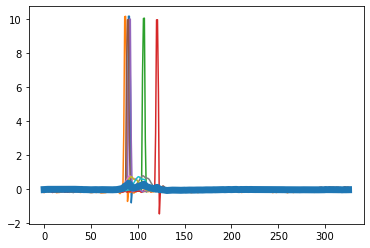

In [12]:
# Visualisar um batimento de teste
plt.plot(beats_teste.iloc[:10,:-2].T);
plt.plot(beats_teste.iloc[:,:-2].T.mean(axis=1),linewidth=5);

In [13]:
# Aplicar PanTompkins na Data Frame de Teste
beats_train_val = pd.DataFrame()
N = len(train_val_df)
for x in range(N):
    print(str(x)+"/"+str(N-1))
    beats_train_val = beats_train_val.append(pantompkins.batimentos(
        train_val_df.iloc[x,:-4],#sinal
        train_val_df.iloc[x, -1],#codigo
        train_val_df.iloc[x, -2],#frequencia
        train_val_df.iloc[x, -3]))#lead

0/89
1/89
2/89
3/89
4/89
5/89
6/89
7/89
8/89
9/89
10/89
11/89
12/89
13/89
14/89
15/89
16/89
17/89
18/89
19/89
20/89
21/89
22/89
23/89
24/89
25/89
26/89
27/89
28/89
29/89
30/89
31/89
32/89
33/89
34/89
35/89
36/89
37/89
38/89
39/89
40/89
41/89
42/89
43/89
44/89
45/89
46/89
47/89
48/89
49/89
50/89
51/89
52/89
53/89
54/89
55/89
56/89
57/89
58/89
59/89
60/89
61/89
62/89
63/89
64/89
65/89
66/89
67/89
68/89
69/89
70/89
71/89
72/89
73/89
74/89
75/89
76/89
77/89
78/89
79/89
80/89
81/89
82/89
83/89
84/89
85/89
86/89
87/89
88/89
89/89


In [14]:
print(f'Shape: {beats_train_val.shape}')
beats_train_val.head(10)

Shape: (991, 328)


,0,1,2,3,4,5,6,7,8,9,...,318,319,320,321,322,323,324,325,326,327
0,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.014,-0.010,-0.010,...,-0.010,-0.010,-0.009,-0.012,-0.015,-0.010,-0.009,-0.014,HR11394,0.0
1,-0.035,-0.038,-0.040,-0.040,-0.045,-0.049,-0.050,-0.050,-0.050,-0.050,...,0.015,0.015,0.015,0.012,0.009,0.010,0.010,0.010,HR11394,0.0
2,0.018,0.015,0.015,0.015,0.012,0.009,0.010,0.010,0.010,0.011,...,-0.048,-0.054,-0.057,-0.061,-0.065,-0.061,-0.057,-0.051,HR11394,0.0
3,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,...,-0.025,-0.022,-0.020,-0.018,-0.010,-0.010,-0.010,-0.010,HR11394,0.0
4,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,...,-0.030,-0.027,-0.024,-0.025,-0.025,-0.021,-0.020,-0.020,HR11394,0.0
5,-0.050,-0.047,-0.044,-0.045,-0.045,-0.045,-0.044,-0.047,-0.050,-0.050,...,0.000,0.000,0.000,0.001,-0.002,-0.005,-0.005,-0.005,HR11394,0.0
6,-0.005,-0.005,-0.008,-0.011,-0.010,-0.010,-0.018,-0.024,-0.026,-0.024,...,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,HR11394,0.0
7,-0.050,-0.050,-0.050,-0.050,-0.050,-0.050,-0.050,-0.050,-0.050,-0.050,...,-0.015,-0.015,-0.015,-0.015,-0.019,-0.020,-0.020,-0.019,HR11394,0.0
8,-0.040,-0.039,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,...,0.000,-0.003,-0.007,-0.011,-0.015,-0.015,-0.014,-0.017,HR11394,0.0
9,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,...,-0.020,-0.020,-0.020,-0.020,-0.020,-0.021,-0.014,-0.007,HR11394,0.0


In [15]:
beats_train_val = beats_train_val.reset_index()
beats_train_val = beats_train_val.drop(['index'], axis=1)
beats_train_val.head(10)

,0,1,2,3,4,5,6,7,8,9,...,318,319,320,321,322,323,324,325,326,327
0,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.014,-0.010,-0.010,...,-0.010,-0.010,-0.009,-0.012,-0.015,-0.010,-0.009,-0.014,HR11394,0.0
1,-0.035,-0.038,-0.040,-0.040,-0.045,-0.049,-0.050,-0.050,-0.050,-0.050,...,0.015,0.015,0.015,0.012,0.009,0.010,0.010,0.010,HR11394,0.0
2,0.018,0.015,0.015,0.015,0.012,0.009,0.010,0.010,0.010,0.011,...,-0.048,-0.054,-0.057,-0.061,-0.065,-0.061,-0.057,-0.051,HR11394,0.0
3,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,-0.040,...,-0.025,-0.022,-0.020,-0.018,-0.010,-0.010,-0.010,-0.010,HR11394,0.0
4,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,-0.015,...,-0.030,-0.027,-0.024,-0.025,-0.025,-0.021,-0.020,-0.020,HR11394,0.0
5,-0.050,-0.047,-0.044,-0.045,-0.045,-0.045,-0.044,-0.047,-0.050,-0.050,...,0.000,0.000,0.000,0.001,-0.002,-0.005,-0.005,-0.005,HR11394,0.0
6,-0.005,-0.005,-0.008,-0.011,-0.010,-0.010,-0.018,-0.024,-0.026,-0.024,...,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,HR11394,0.0
7,-0.050,-0.050,-0.050,-0.050,-0.050,-0.050,-0.050,-0.050,-0.050,-0.050,...,-0.015,-0.015,-0.015,-0.015,-0.019,-0.020,-0.020,-0.019,HR11394,0.0
8,-0.040,-0.039,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,...,0.000,-0.003,-0.007,-0.011,-0.015,-0.015,-0.014,-0.017,HR11394,0.0
9,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,-0.070,...,-0.020,-0.020,-0.020,-0.020,-0.020,-0.021,-0.014,-0.007,HR11394,0.0


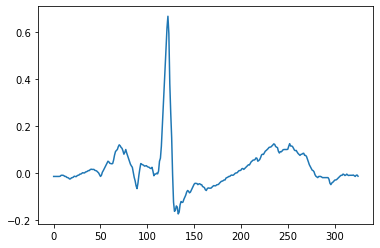

In [16]:
# Visualizar um batimento de treino/validacao
plt.plot(beats_train_val.iloc[:10,:-2].T);
plt.plot(beats_train_val.iloc[:,:-2].T.mean(axis=1),linewidth=5);

In [17]:
# Salvar arquivos de treino e teste sem filtro
beats_train_val.to_csv('../beats/beats_train_val'+ str(codigo[0]) + 'raw.csv')
beats_teste.to_csv('../beats/beats_teste' + str(codigo[0])+ 'lead' +str(leads)+ 'raw.csv')

## Filtragem

Aplicar filtros

In [18]:
# Parametros Filtro Fir
fs = 500
high = 50
low = 0.5

In [19]:
# Filtro Fir Teste
fir_teste = pd.DataFrame()
N = len(beats_teste)
for x in range(N):
    fir_teste = fir_teste.append(pd.Series(
        filtro.denoise_fir(beats_teste.iloc[x, :-2], fs, high, low)), ignore_index=True)

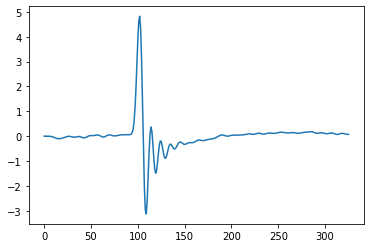

In [20]:
plt.plot(fir_teste.iloc[0])

In [21]:
# Filtro Fir Treino/Teste
fir_treino_val = pd.DataFrame()
N = len(beats_train_val)
for x in range(N):
    fir_treino_val = fir_treino_val.append(pd.Series(
        filtro.denoise_fir(beats_train_val.iloc[x, :-2], fs, high, low)), ignore_index=True)

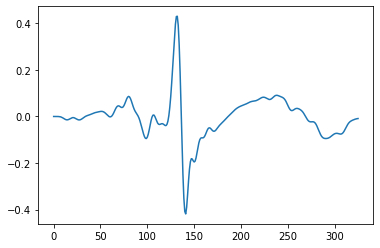

In [22]:
plt.plot(fir_treino_val.iloc[0])

In [23]:
# Filtro Wave db2 Teste
db2_teste = pd.DataFrame()
N = len(beats_teste)
for x in range(N):
    db2_teste = db2_teste.append(pd.Series(
        filtro.denoise_wavelet(2,beats_teste.iloc[x, :-2])), ignore_index=True)

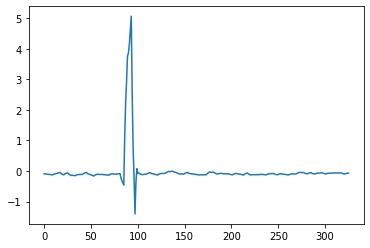

In [24]:
plt.plot(db2_teste.iloc[0])

In [25]:
# Filtro Wave db2 Treino/Teste
db2_treino_val = pd.DataFrame()
N = len(beats_train_val)
for x in range(N):
    db2_treino_val = db2_treino_val.append(pd.Series(
        filtro.denoise_wavelet(2,beats_train_val.iloc[x, :-2])), ignore_index=True)

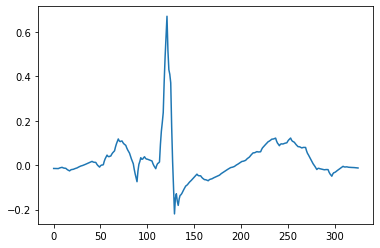

In [26]:
plt.plot(db2_treino_val.iloc[0])

In [27]:
# Filtro Wave db6 Teste
db6_teste = pd.DataFrame()
N = len(beats_teste)
for x in range(N):
    db6_teste = db6_teste.append(pd.Series(
        filtro.denoise_wavelet(6,beats_teste.iloc[x, :-2])), ignore_index=True)

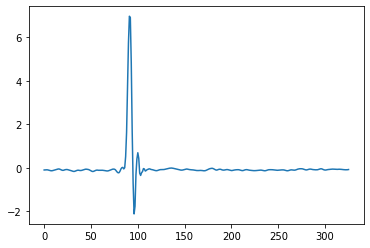

In [28]:
plt.plot(db6_teste.iloc[0])

In [29]:
# Filtro Wave db6 Treino/Teste
db6_treino_val = pd.DataFrame()
N = len(beats_train_val)
for x in range(N):
    db6_treino_val = db6_treino_val.append(pd.Series(
        filtro.denoise_wavelet(6,beats_train_val.iloc[x, :-2])), ignore_index=True)

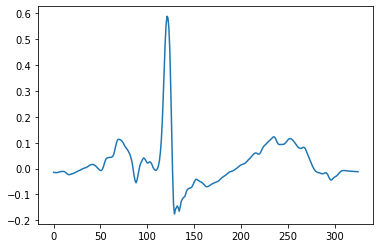

In [30]:
plt.plot(db6_treino_val.iloc[0])

In [31]:
fir_treino_val.to_csv('../beats/beats_train_val'+ str(codigo[0]) + 'lead' + str(leads) + 'fir.csv')
fir_teste.to_csv('../beats/beats_teste' + str(codigo[0])+ 'lead' + str(leads) + 'fir.csv')
db2_treino_val.to_csv('../beats/beats_train_val'+ str(codigo[0]) + 'lead' + str(leads) + 'db2.csv')
db2_teste.to_csv('../beats/beats_teste' + str(codigo[0])+ 'lead' + str(leads) + 'db2.csv')
db6_treino_val.to_csv('../beats/beats_train_val'+ str(codigo[0]) + 'lead' + str(leads) + 'db6.csv')
db6_teste.to_csv('../beats/beats_teste' + str(codigo[0])+ 'lead' + str(leads) + 'db6.csv')